In [1]:
from sklearn.datasets._samples_generator import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import random
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [19]:
def generateRandomBlob(i):
  random.seed(i)
  n_cluster = random.randint(5, 20)
  n_samples = random.randint(400, 800)
  cluster_std = random.uniform(0.3, 0.7)
  return make_blobs(n_samples=n_samples, centers=n_cluster, cluster_std=cluster_std, random_state=42)

In [ ]:
def showThreshold(threshold, link_matrix):
  plt.figure(figsize=(12,6))
  dendrogram(link_matrix)
  plt.xticks(fontsize=10, rotation=90)
  plt.axhline(y=threshold, color='red', linestyle='--', label=f'Soglia = {threshold}')
  plt.tight_layout()
  plt.show()

In [ ]:
def findThreshold(link_matrix, verbose=True):
  old_nr = [-1,-1]
  for i in range(1,50):
    clusters = fcluster(link_matrix, t=i, criterion='distance')
    n_cluster = len(set(clusters))
    
    if(n_cluster == old_nr[0] & n_cluster == old_nr[1]):
      if(verbose):
        showThreshold(i, link_matrix)
      return [i, n_cluster]
    
    old_nr = [old_nr[1], n_cluster]
  return 1

In [ ]:
def estimate_centroids(data, linked, threshold):
  if isinstance(data, np.ndarray):
      data = pd.DataFrame(data, columns=[f"x{i+1}" for i in range(data.shape[1])])
  
  cluster_labels = fcluster(linked, t=threshold, criterion='distance')
  data['cluster'] = cluster_labels

  centroidi = data.groupby('cluster').mean(numeric_only=True)

  return centroidi

In [6]:
X, _ = generateRandomBlob(12)

creo la matrice di linkage

In [7]:
link_matrix = linkage(X, method="ward")

trovo il threshold

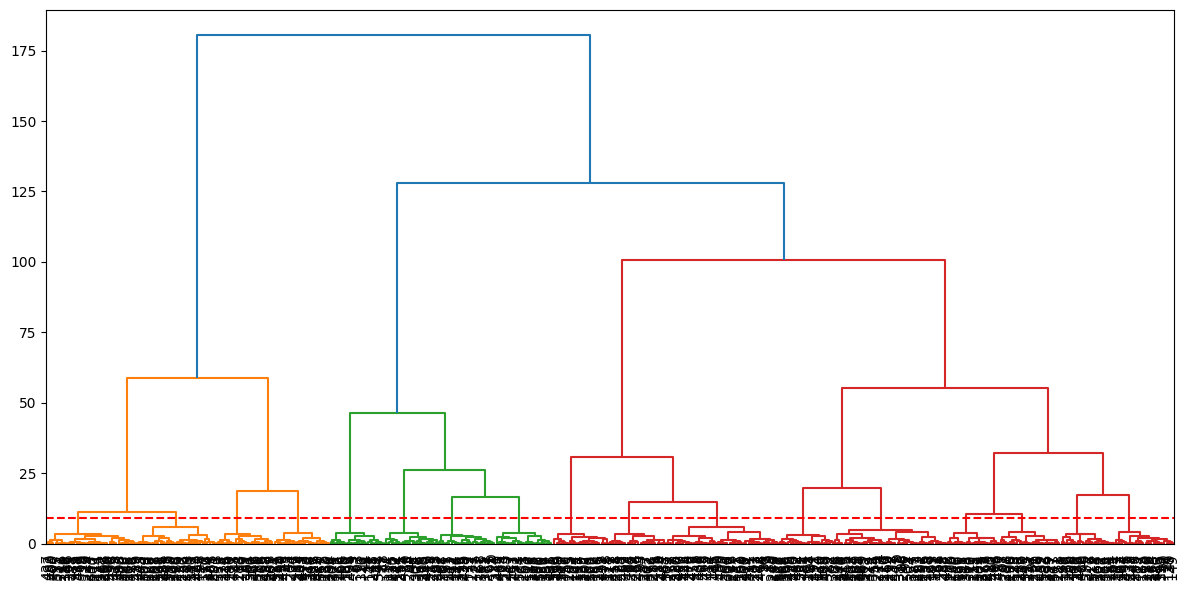

In [ ]:
threshold, value = findThreshold(link_matrix)

In [ ]:
threshold, value

(9, 17)

stimo i centroidi

In [ ]:
centroids = estimate_centroids(X, link_matrix, threshold=threshold)


visualizzo il risultato

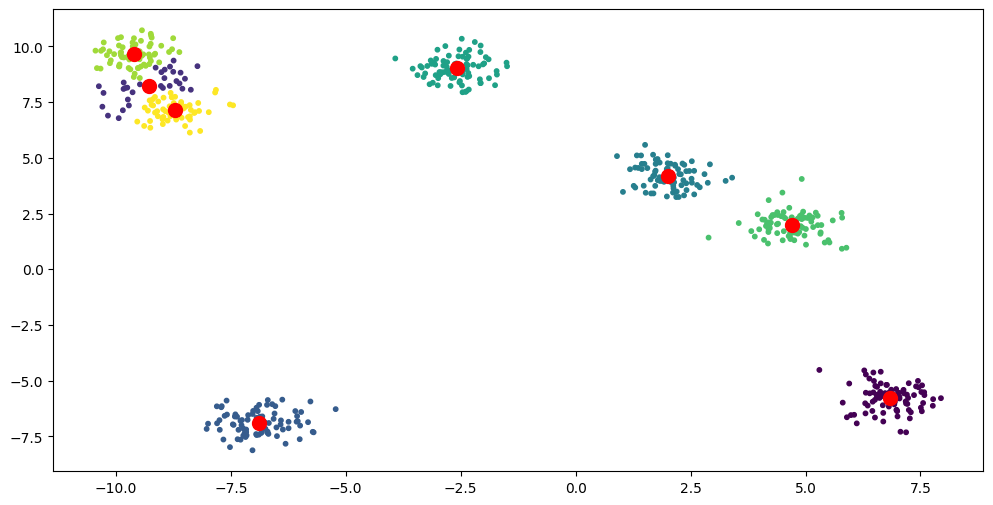

In [24]:
hc = AgglomerativeClustering(value)
y = hc.fit_predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="viridis")
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='red', marker='o', s=100, label='Centroidi stimati')
plt.show()

ora proviamo l'algoritmo per diversi casi

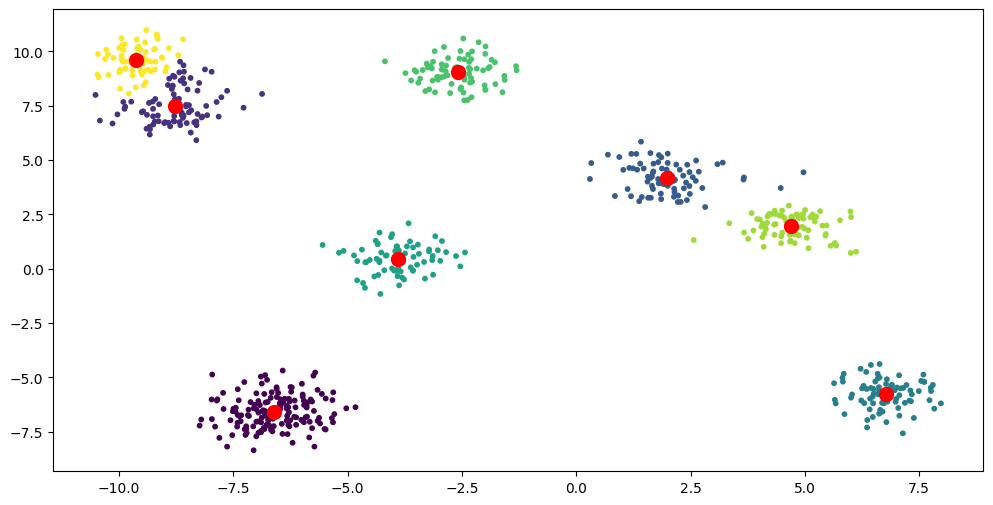

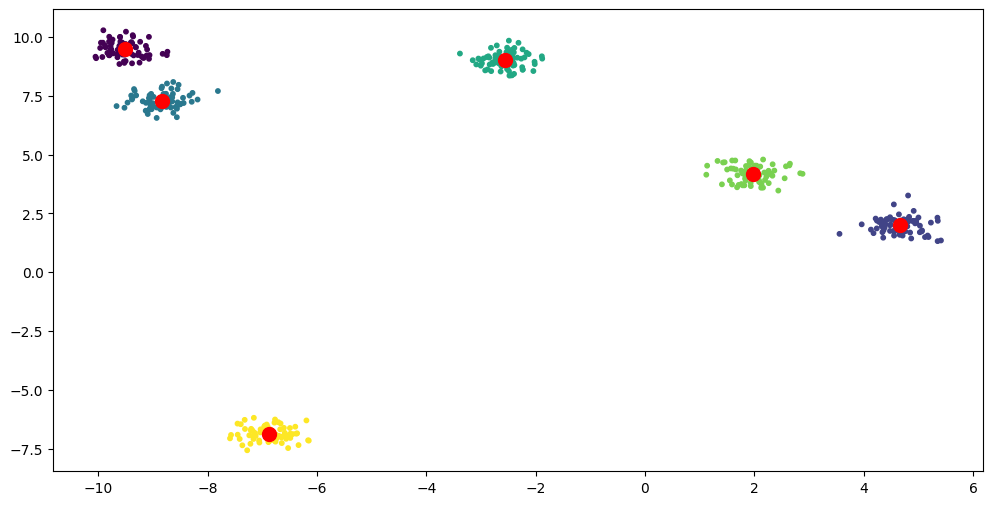

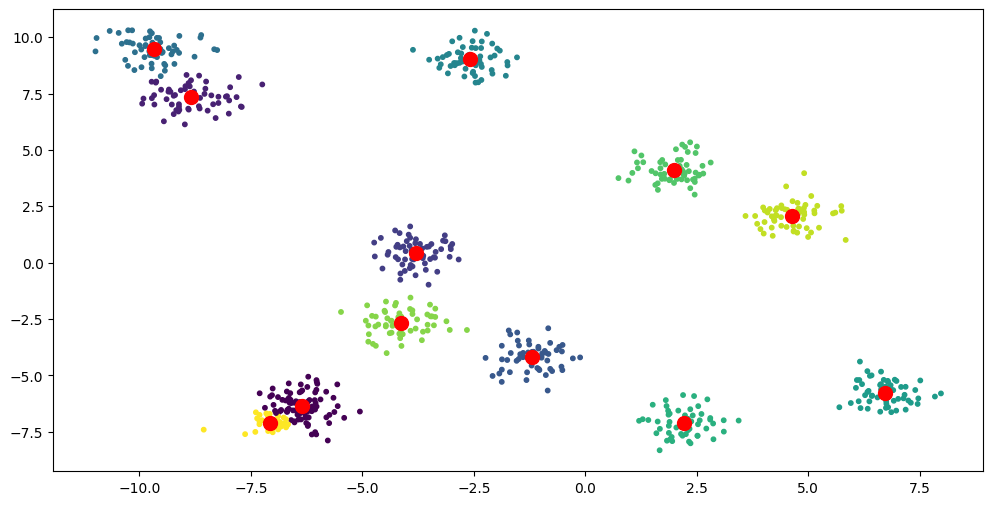

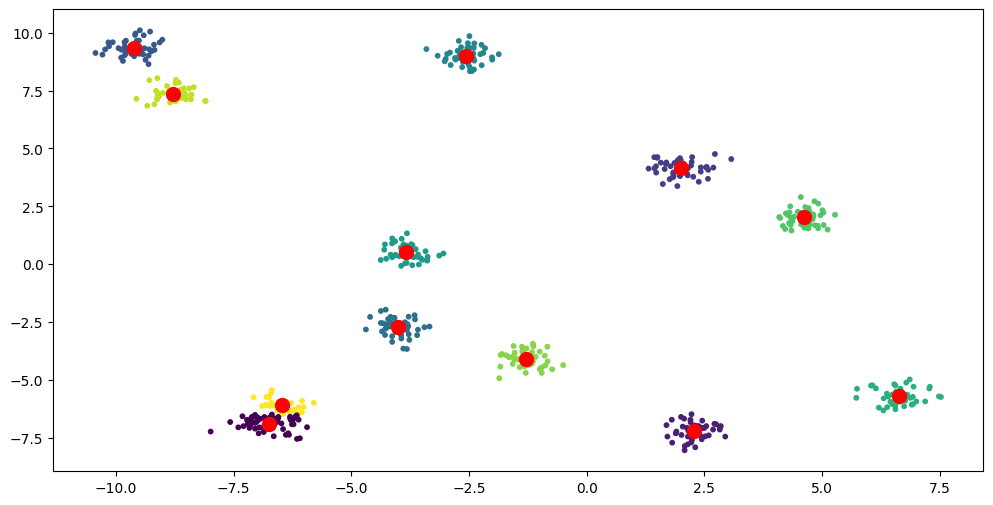

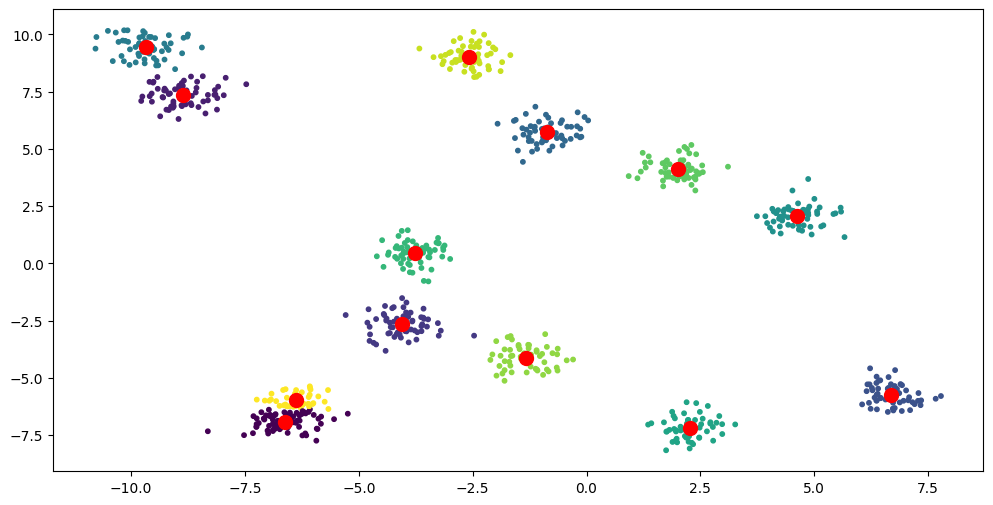

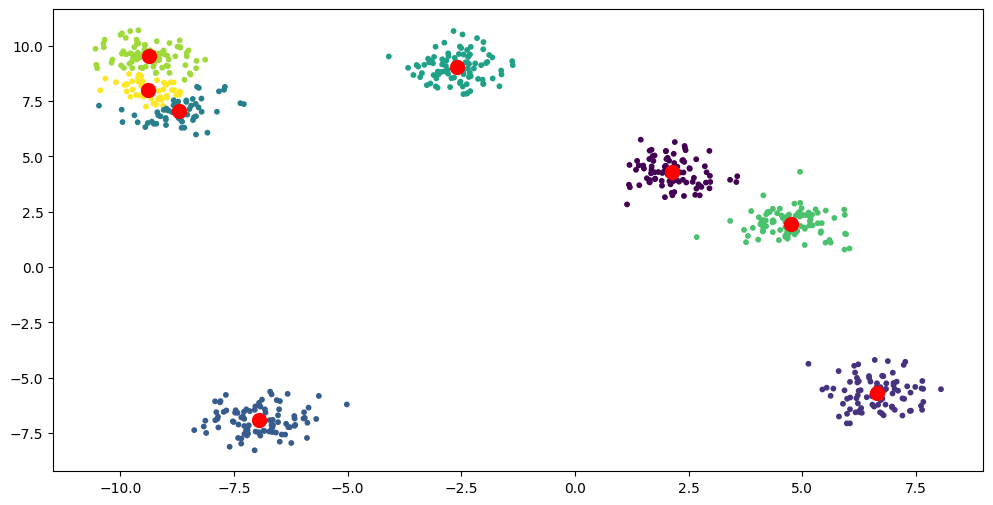

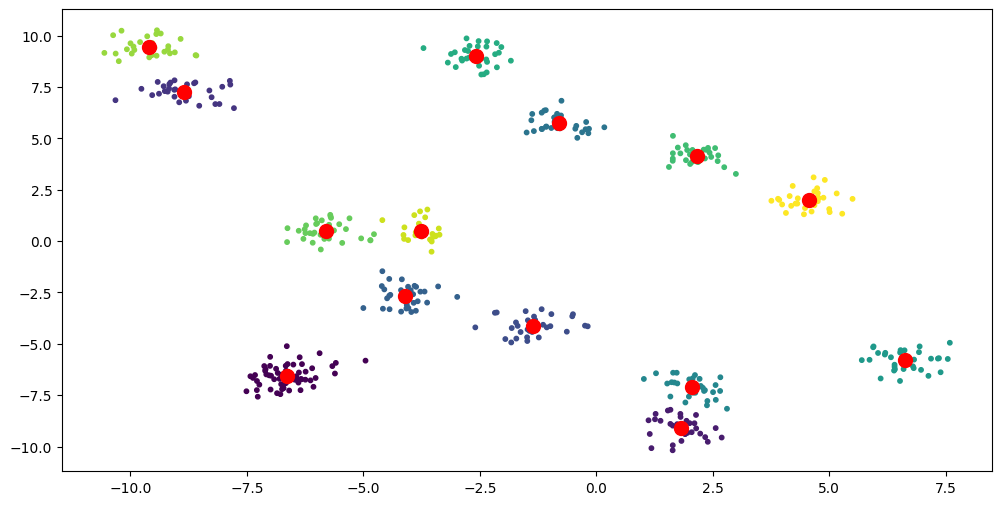

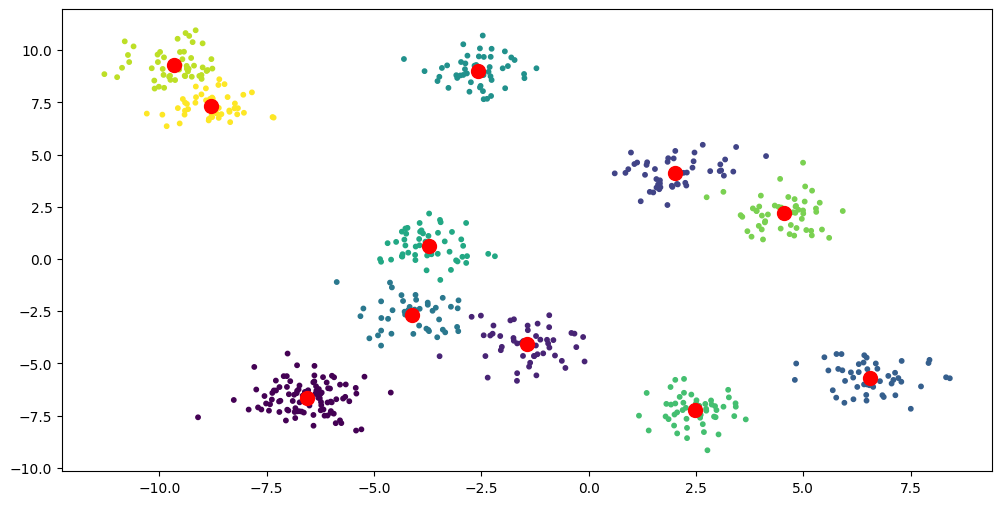

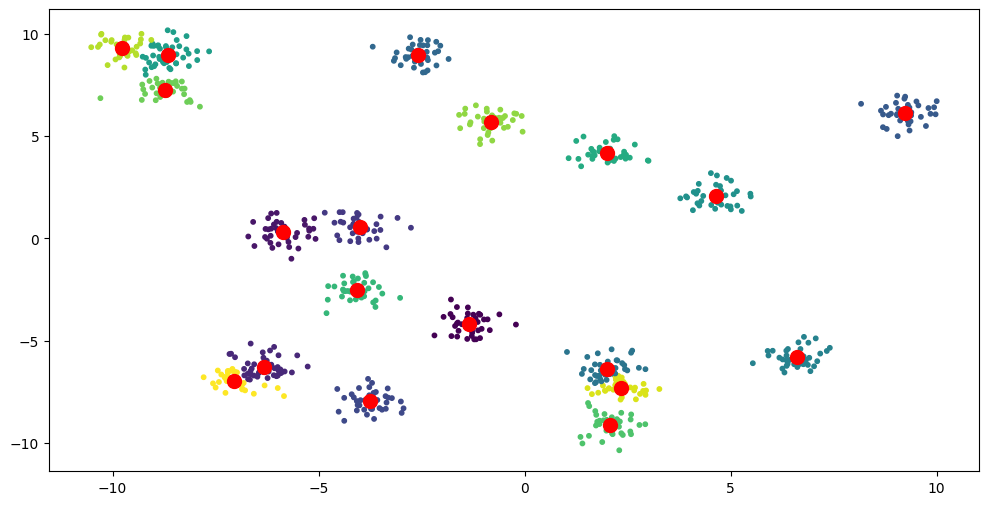

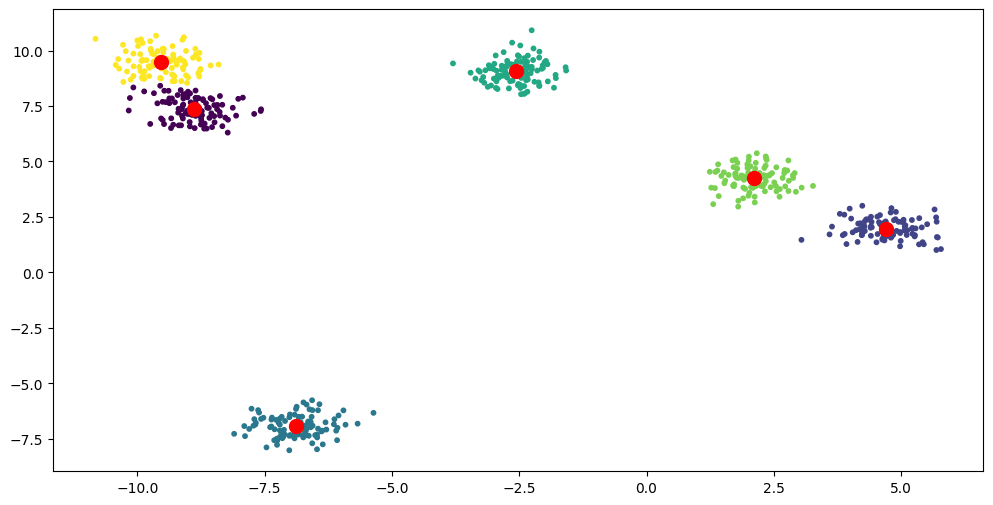

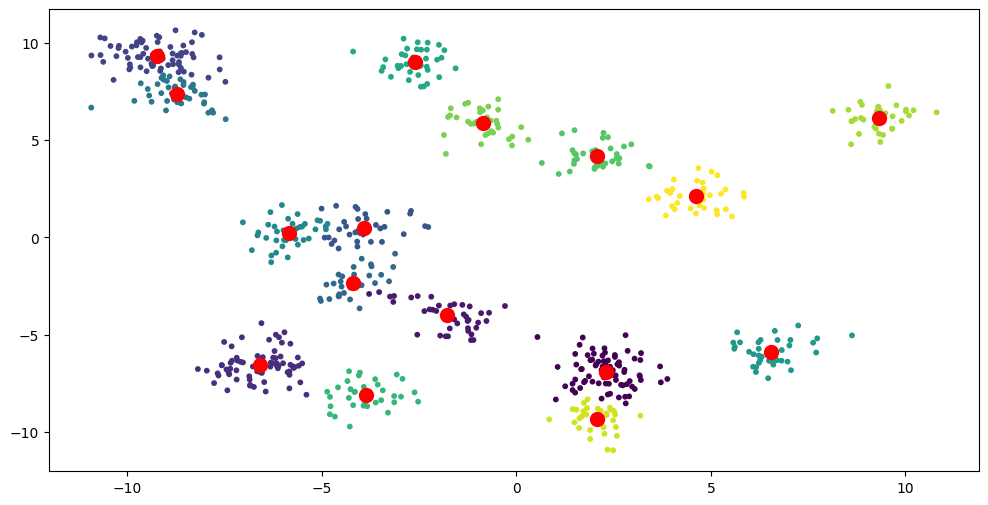

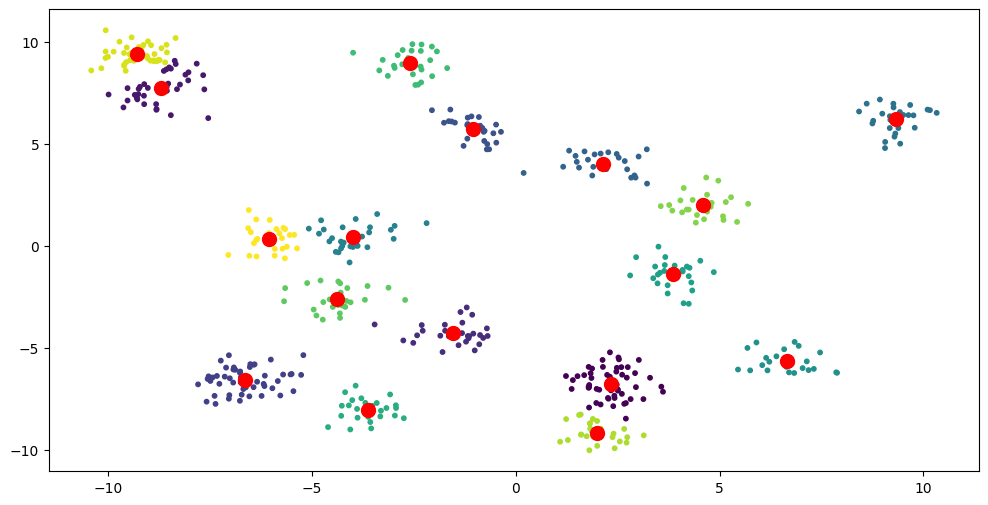

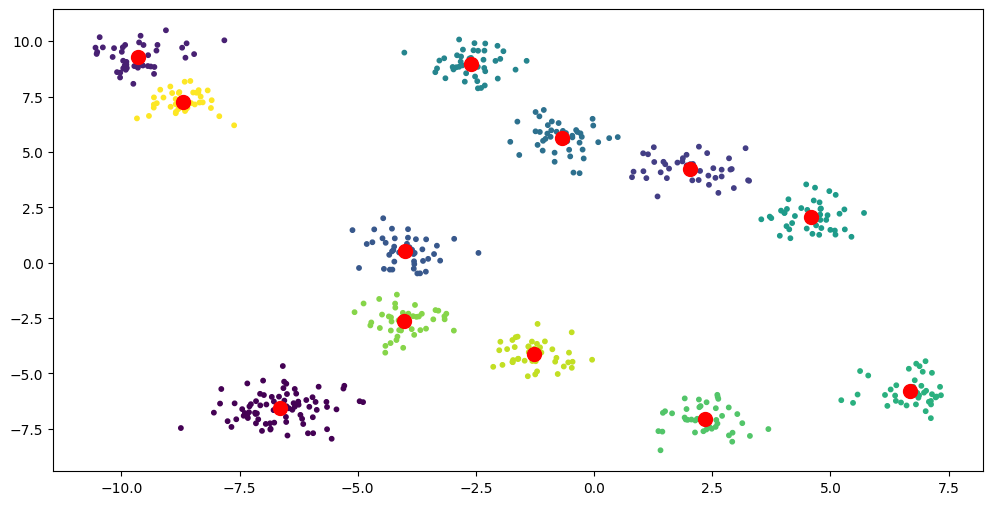

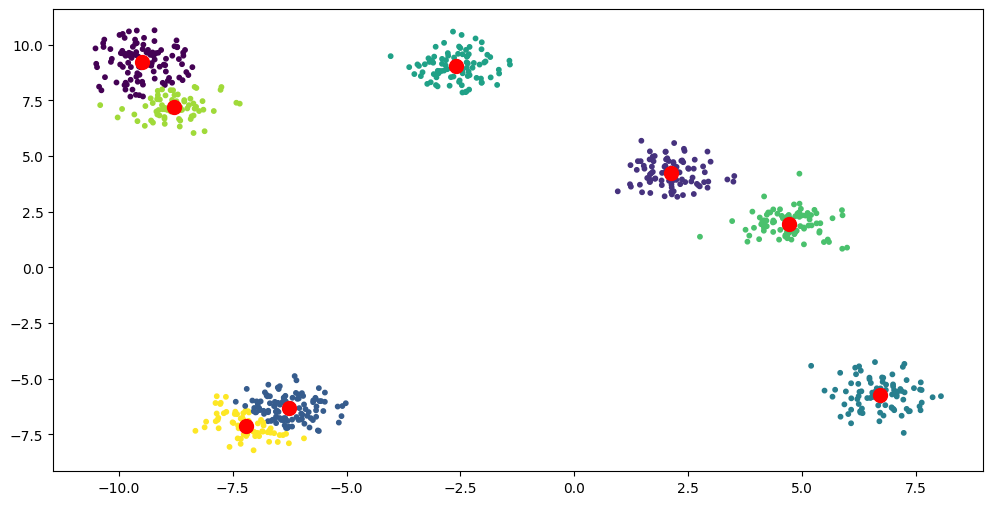

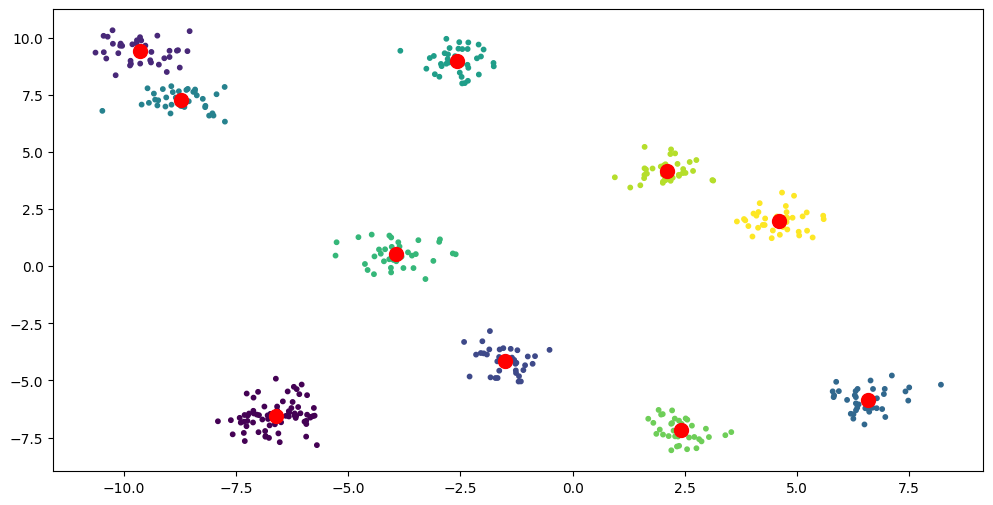

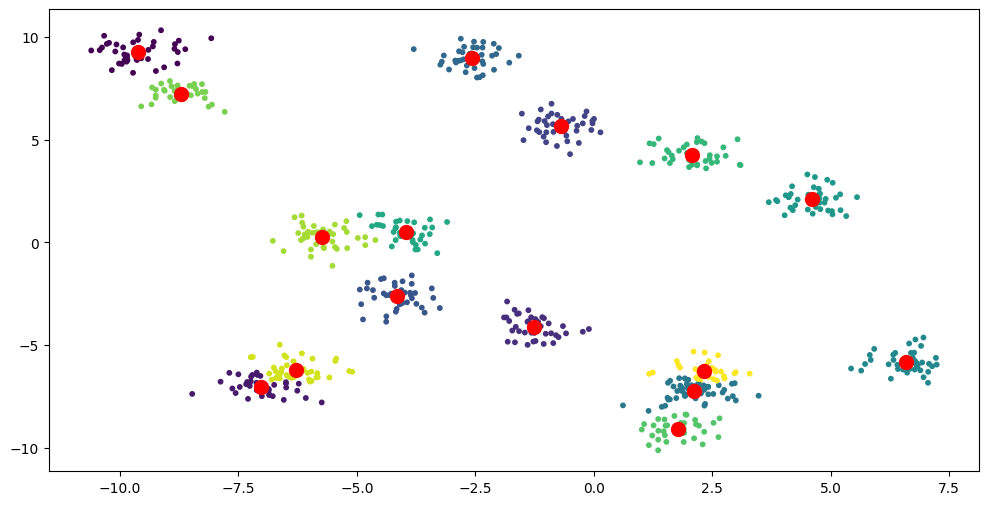

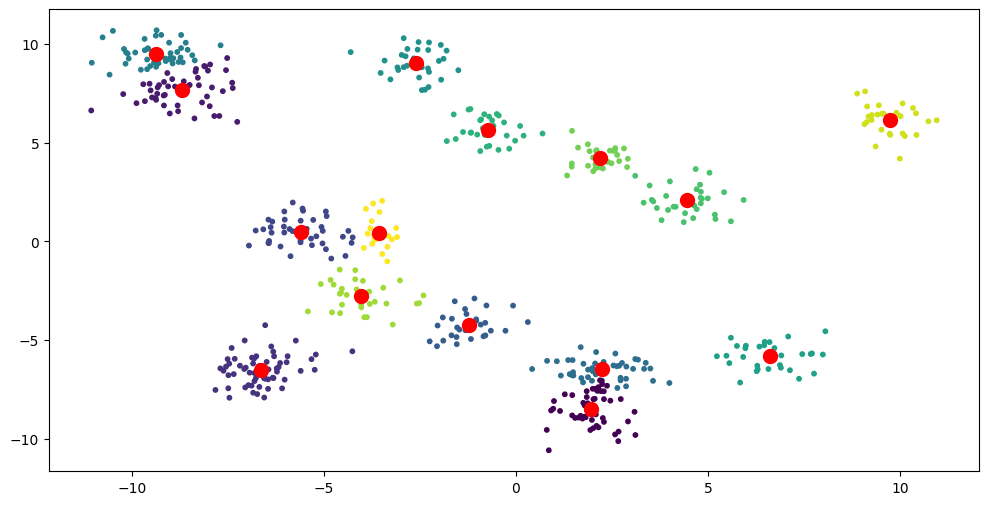

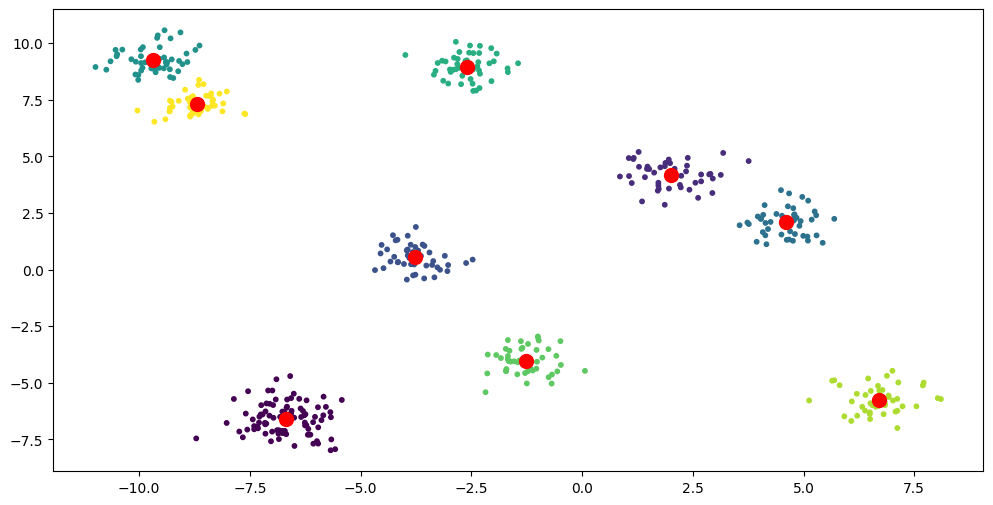

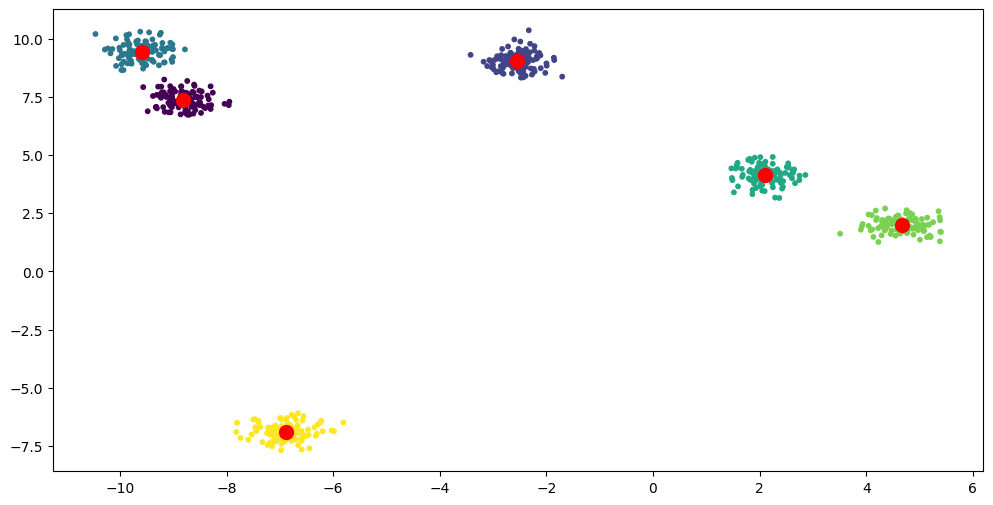

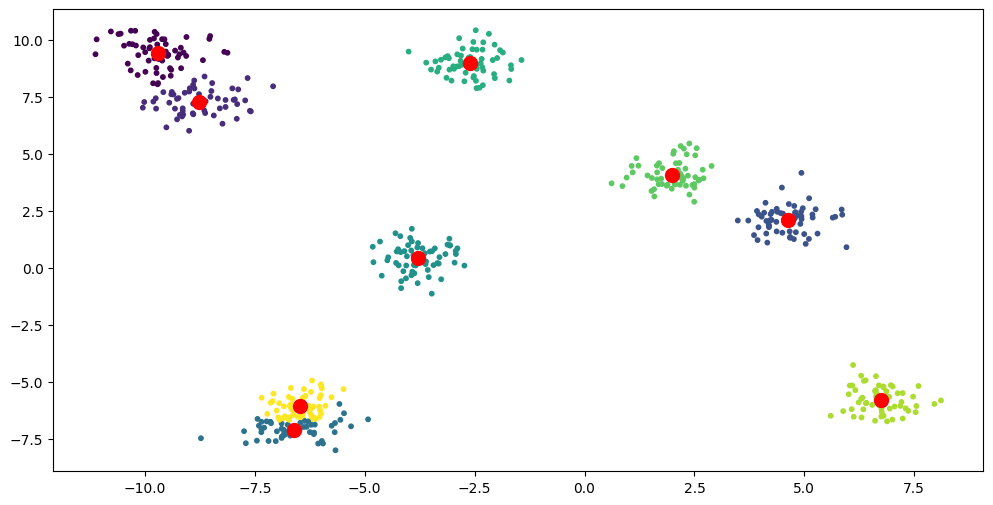

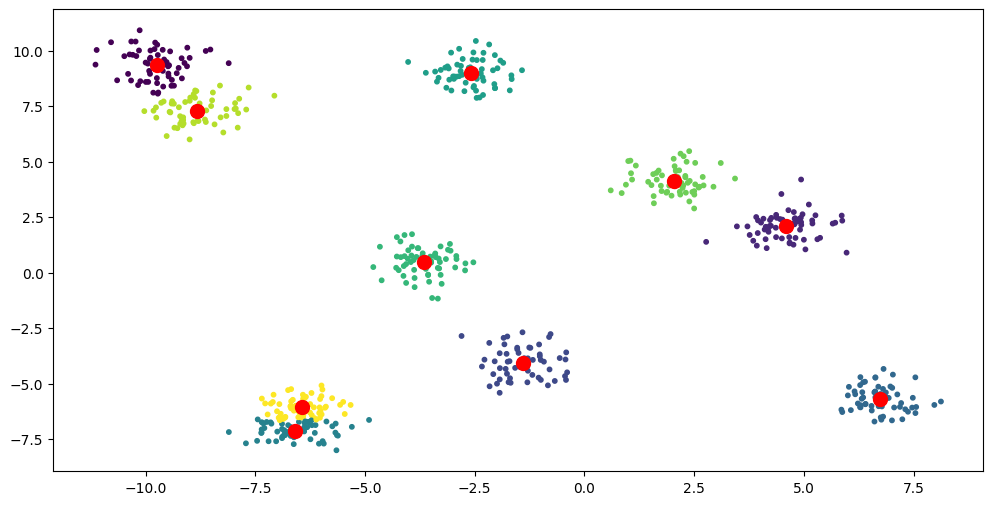

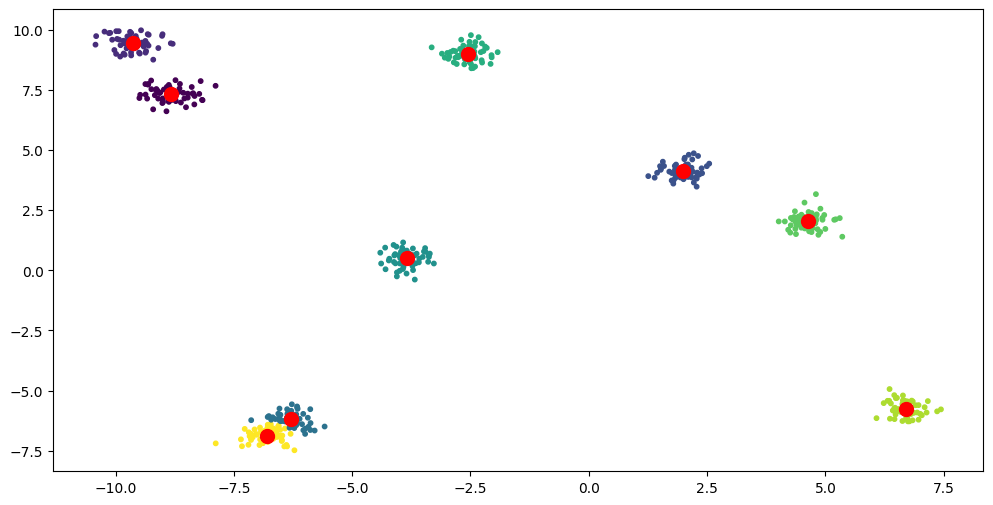

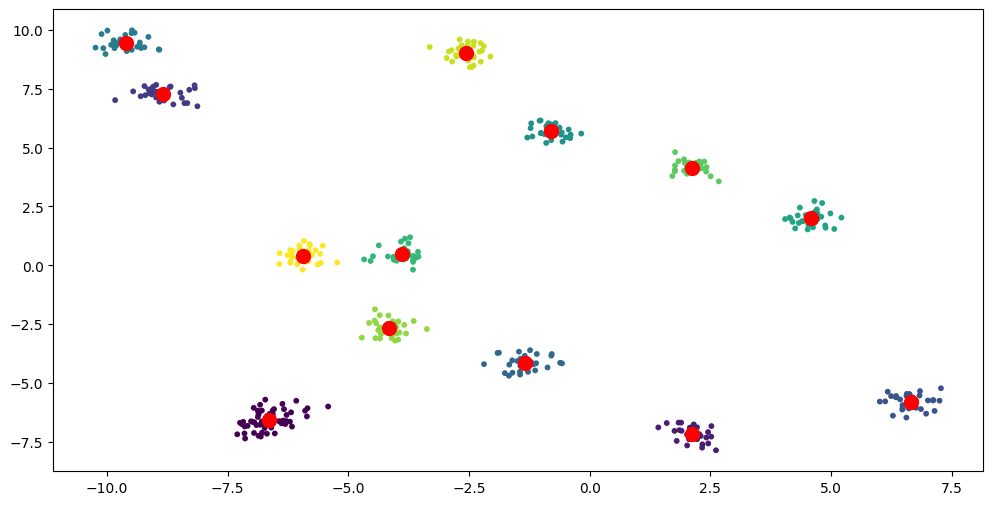

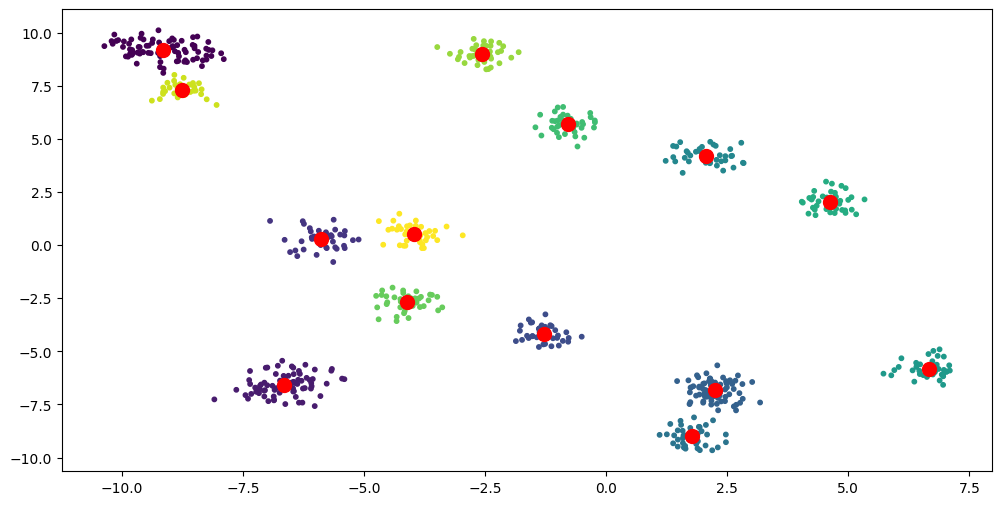

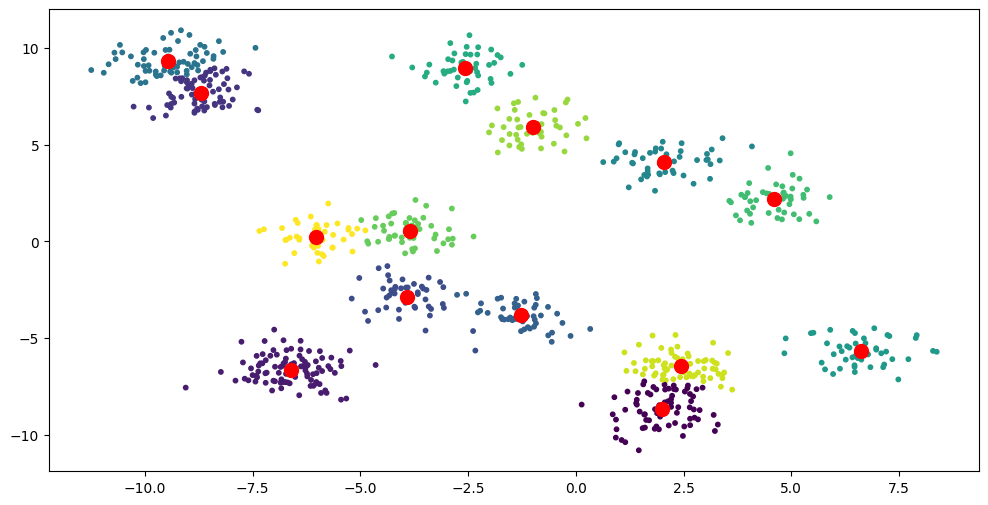

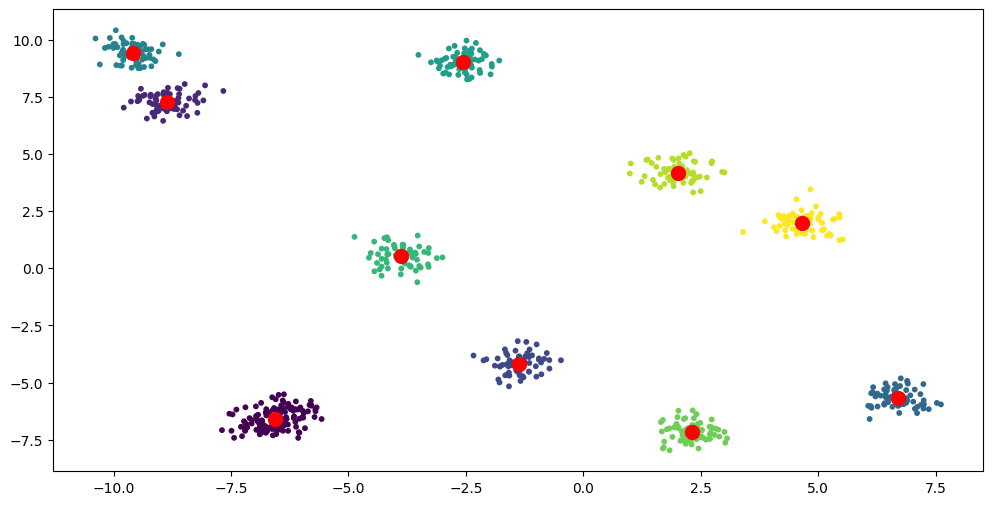

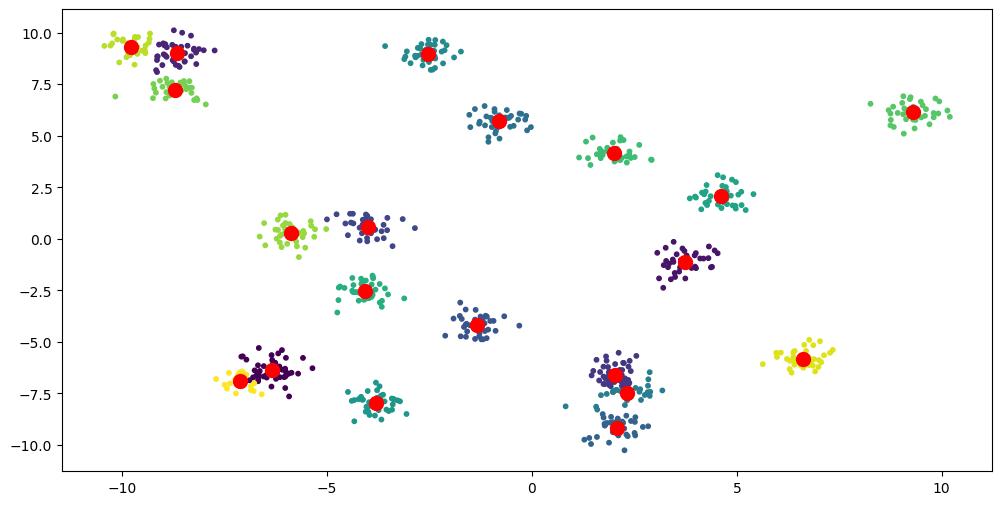

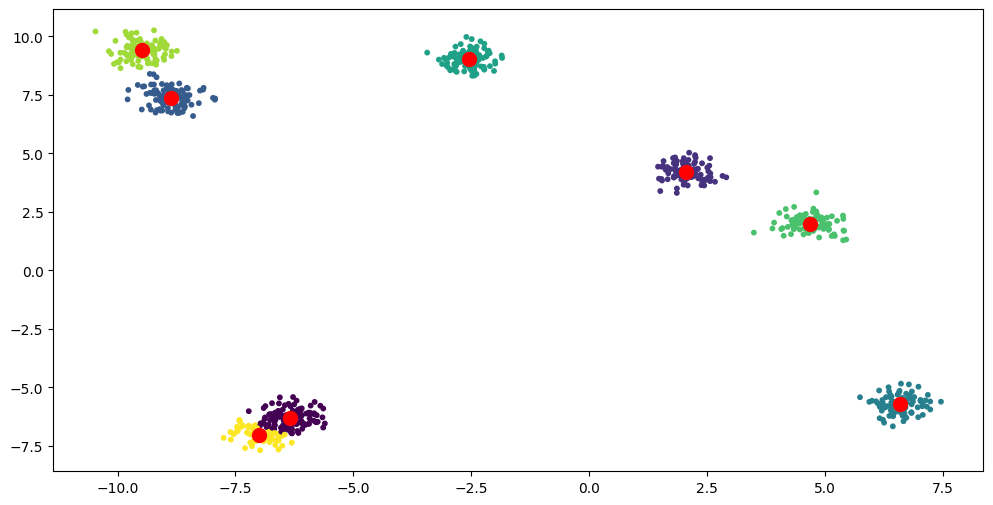

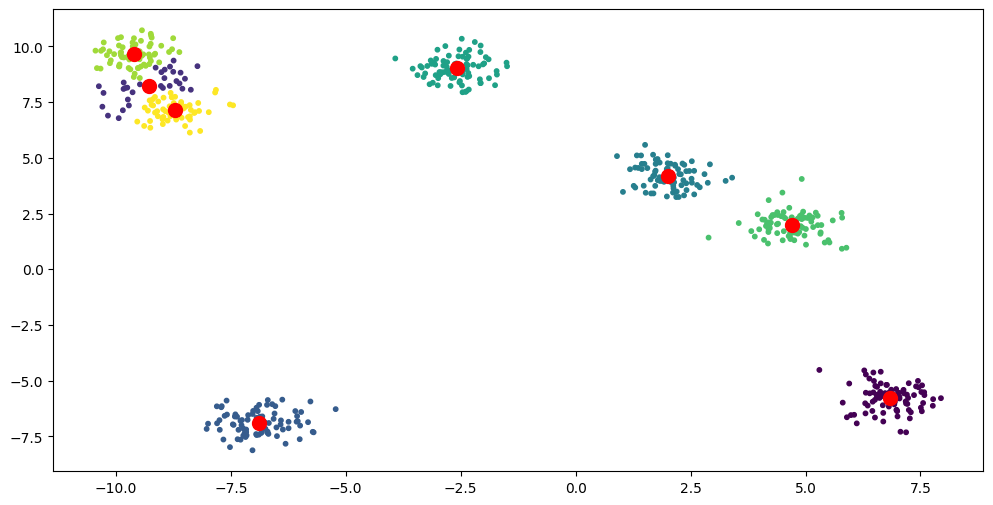

In [ ]:
for i in range(1,30):
  X, _ = generateRandomBlob(i)
  
  link_matrix = linkage(X, method="ward")
  
  threshold, value = findThreshold(link_matrix, verbose=False)
  
  centroids = estimate_centroids(X, link_matrix, threshold=threshold)

  hc = AgglomerativeClustering(value)
  y = hc.fit_predict(X)
  plt.figure(figsize=(12,6))
  plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap="viridis")
  plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='red', marker='o', s=100, label='Centroidi stimati')
  plt.show()